In [1]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib

In [2]:
hotel1 = pd.read_csv("K:/DATA SCIENCE/DataSets/hotel_bookings 2.csv")

In [3]:
hotel1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
hotel1.shape

(119390, 32)

In [5]:
hotel1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
hotel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
hotel1['reservation_status_date'] = pd.to_datetime(hotel1['reservation_status_date'] , format = '%d/%m/%Y')

In [10]:
hotel1['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB


In [11]:
hotel1.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
for col in hotel1.describe(include = 'object').columns:
    print(col, ':')
    print(hotel1[col].unique())
    print('_'*50)
    

hotel :
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month :
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal :
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country :
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 

In [13]:
hotel1.drop(['company','agent'] , axis =1, inplace = True)

In [14]:
hotel1.dropna(inplace= True)

In [15]:
hotel1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
hotel1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x2334f0792d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2334f099050>,
 'boxes': [<matplotlib.lines.Line2D at 0x2334f07b850>],
 'medians': [<matplotlib.lines.Line2D at 0x2334f09a4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2334f09a7d0>],
 'means': []}

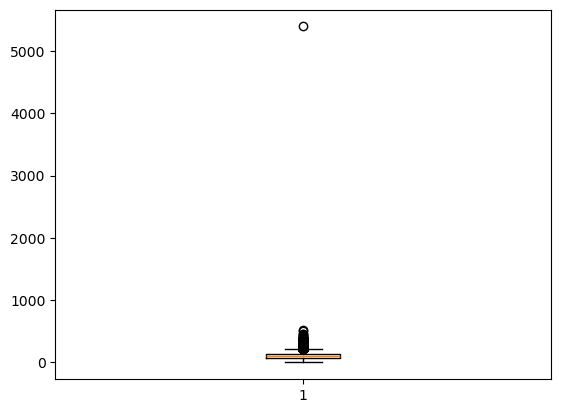

In [17]:
plt.boxplot(hotel1['adr'])

In [18]:
hotel1 = hotel1[hotel1['adr']<5000]

{'whiskers': [<matplotlib.lines.Line2D at 0x2334f926a50>,
 'caps': [<matplotlib.lines.Line2D at 0x2334f927e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2334e75d3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2334f934f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2334f935850>],
 'means': []}

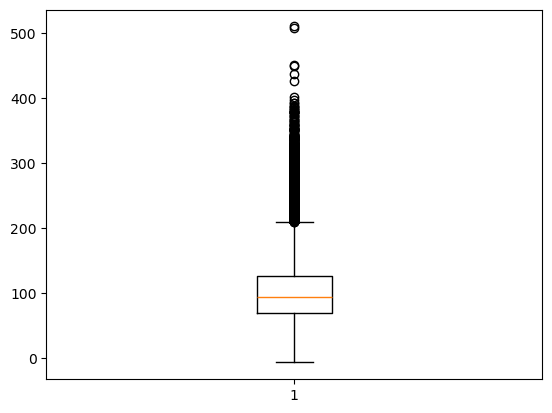

In [19]:
plt.boxplot(hotel1['adr'])

# Data Analysis and Visualization

In [20]:
cancelled_percentage = hotel1['is_canceled'].value_counts(normalize = True)
cancelled_percentage

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

37% of bookings are getting cancelled.

In [21]:
c= hotel1['is_canceled'].value_counts()
c

is_canceled
0    74745
1    44152
Name: count, dtype: int64

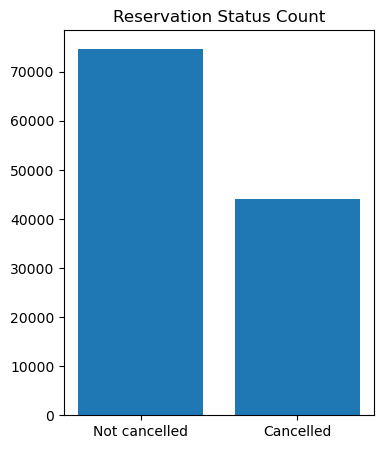

In [22]:
plt.figure(figsize = (4,5))
plt.title('Reservation Status Count')
plt.bar(['Not cancelled','Cancelled'],hotel1['is_canceled'].value_counts())
plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

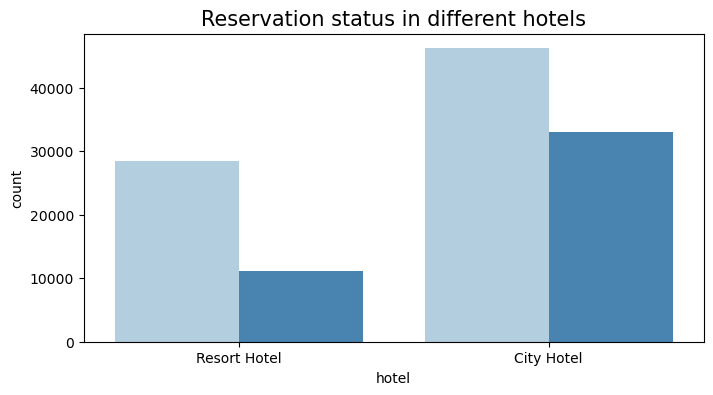

In [33]:
plt.figure(figsize = (8,4))
plt.title('Reservation status in different hotels', size = 15)
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = hotel1, palette = 'Blues')


           

In [36]:
resort_hotel = hotel1[hotel1['hotel'] == 'Resort Hotel']

In [38]:
resort_hotel['is_canceled'].value_counts( normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

27% of bookings are getting cancelled for resort hotels.

In [40]:
city_hotel = hotel1[hotel1['hotel'] == 'City Hotel']

In [41]:
city_hotel['is_canceled'].value_counts( normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

41% of bookings are getting cancelled for City Hotels.

In [43]:
resort_hotel1 = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel1 = city_hotel.groupby('reservation_status_date')[['adr']].mean()

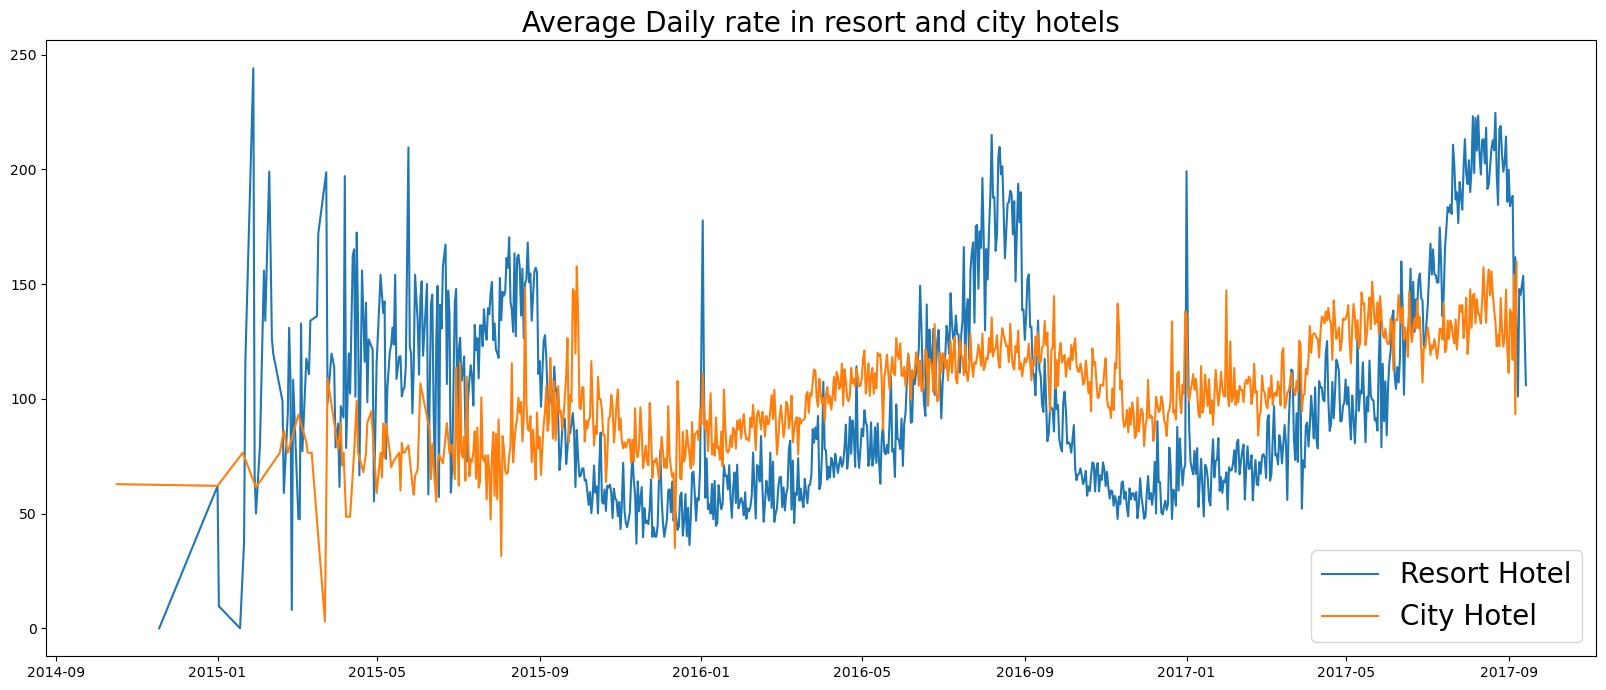

In [52]:
plt.figure( figsize = (20,8))
plt.title('Average Daily rate in resort and city hotels' , size = 20)
plt.plot(resort_hotel1.index , resort_hotel1.adr, label = 'Resort Hotel')
plt.plot(city_hotel1.index , city_hotel1.adr, label = 'City Hotel')
plt.legend(fontsize = 20)

In [53]:
hotel1['Month'] = hotel1['reservation_status_date'].dt.month

AttributeError: 'numpy.int64' object has no attribute 'startswith'

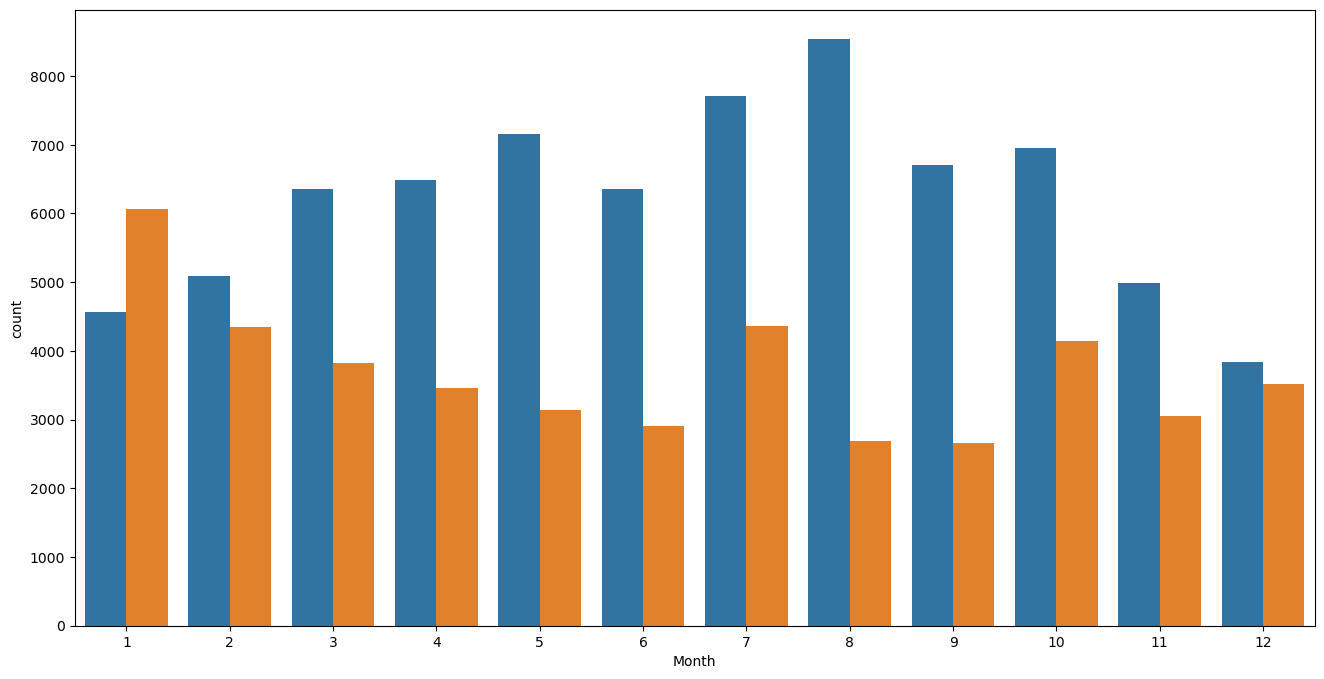

In [58]:
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = hotel1['Month'] , hue = hotel1['is_canceled'] )

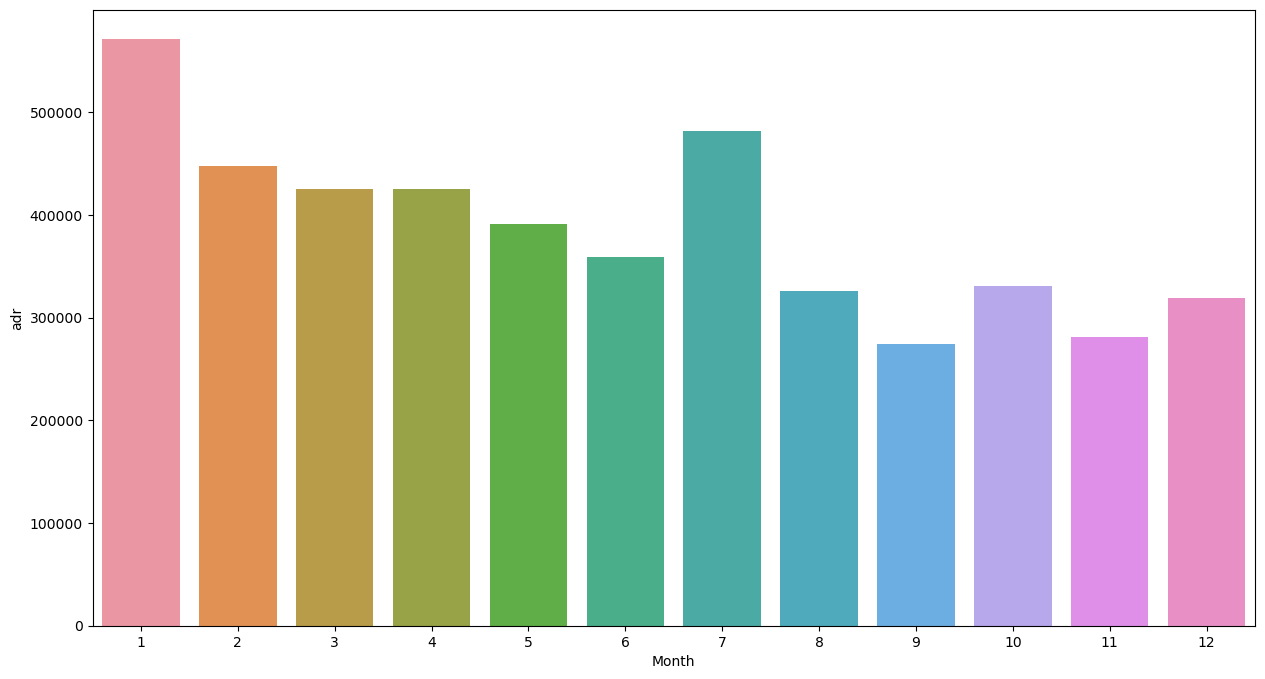

In [72]:
plt.figure( figsize = (15,8))
sns.barplot(x='Month', y='adr', data=hotel1[hotel1['is_canceled'] == 1].groupby('Month')[['adr']].sum().reset_index())
plt.show()

In [73]:
cancelled_data = hotel1[hotel1['is_canceled'] ==1]

In [75]:
top10_country = cancelled_data['country'].value_counts()[:10]

([<matplotlib.patches.Wedge at 0x233612d5b50>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

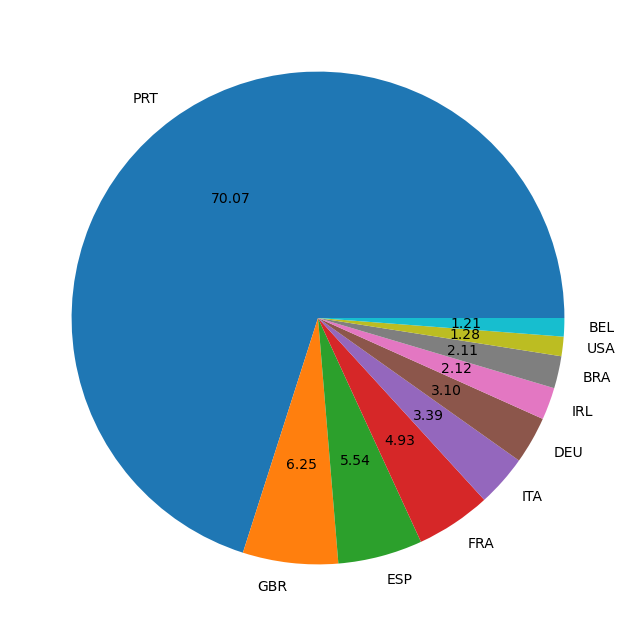

In [81]:
plt.figure(figsize = (8,8))
plt.pie(top10_country, autopct = '%.2f', labels = top10_country.index)

Portugal has most cancellation rate which is 70%.

In [82]:
hotel1.market_segment.value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [83]:
hotel1.market_segment.value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

Most of customers are coming from online travel agent.

In [84]:
cancelled_data.market_segment.value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

Most of the cancellations are also done from online travel agent.

In [92]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace = True)
cancelled_data_adr.sort_values('reservation_status_date', inplace = True)

notcancelled_data = hotel1[hotel1['is_canceled'] == 0]
notcancelled_data_adr = notcancelled_data.groupby('reservation_status_date')[['adr']].mean()
notcancelled_data_adr.reset_index(inplace = True)
notcancelled_data_adr.sort_values('reservation_status_date', inplace = True)

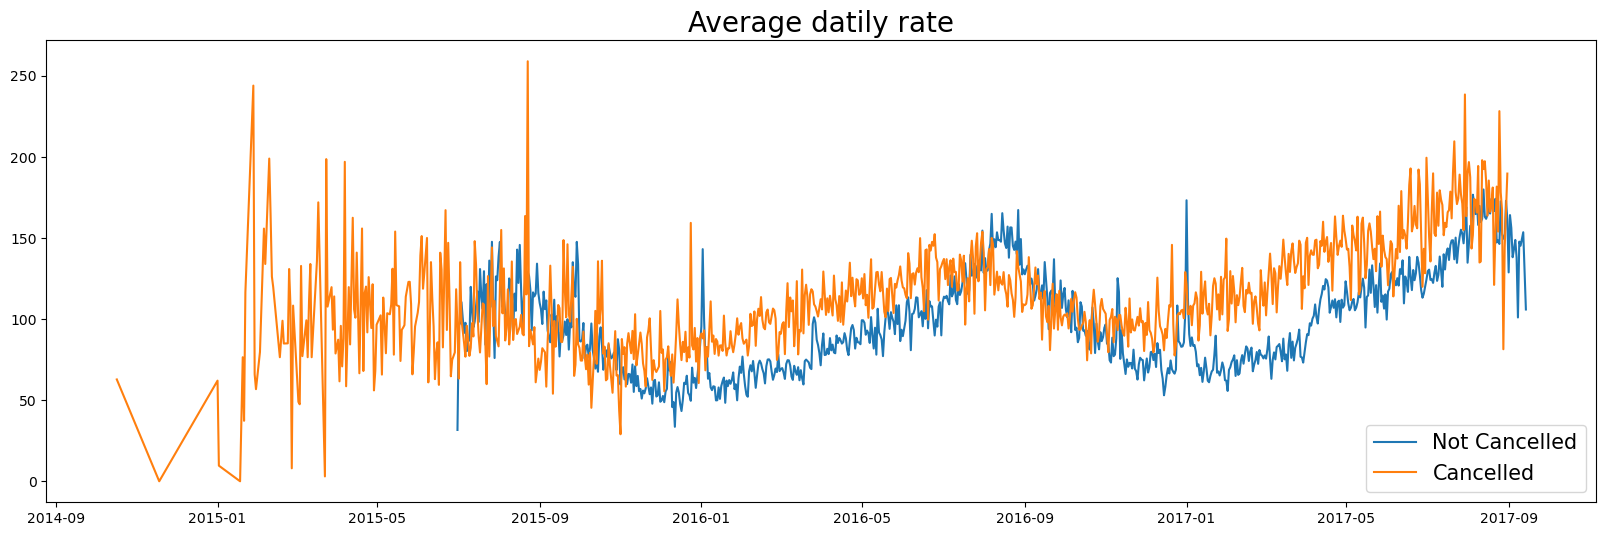

In [101]:
plt.figure( figsize = (20,6))
plt.title('Average datily rate', size = 20)
plt.plot(notcancelled_data_adr['reservation_status_date'], notcancelled_data_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 15)
plt.show()

In [96]:
cancelled_data_adr1 = cancelled_data_adr[(cancelled_data_adr['reservation_status_date'] > '2016') & (cancelled_data_adr['reservation_status_date'] < '2017-9')]
notcancelled_data_adr1 = notcancelled_data_adr[(notcancelled_data_adr['reservation_status_date'] > '2016') & (notcancelled_data_adr['reservation_status_date'] < '2017-9')]

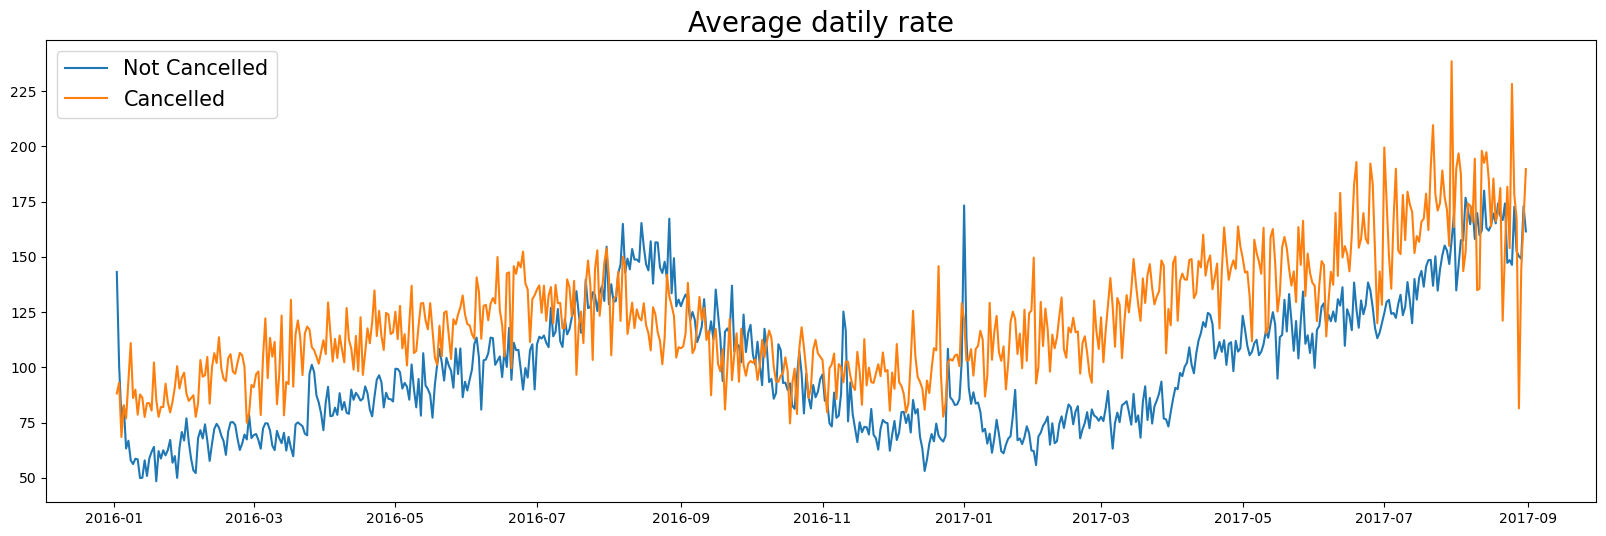

In [100]:
plt.figure( figsize = (20,6))
plt.title('Average datily rate', size = 20)
plt.plot(notcancelled_data_adr1['reservation_status_date'], notcancelled_data_adr1['adr'], label = 'Not Cancelled')
plt.plot(cancelled_data_adr1['reservation_status_date'], cancelled_data_adr1['adr'], label = 'Cancelled')
plt.legend(fontsize = 15)
plt.show()